In [1]:
import re
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
data = pd.read_csv('/kaggle/input/disneyland-reviews/DisneylandReviews.csv', encoding='latin-1')
data.head()

Review_ID  Rating Year_Month     Reviewer_Location  \
0  670772142       4     2019-4             Australia   
1  670682799       4     2019-5           Philippines   
2  670623270       4     2019-4  United Arab Emirates   
3  670607911       4     2019-4             Australia   
4  670607296       4     2019-4        United Kingdom   

                                         Review_Text               Branch  
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong  
1  Its been a while since d last time we visit HK...  Disneyland_HongKong  
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong  
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong  
4  the location is not in the city, took around 1...  Disneyland_HongKong

In [3]:
df = pd.DataFrame()
df['Text'] = data['Review_Text'][0 : 5000]

## **Magic of Regular Expressions in NLP**

## *Extracting Email Address using Regular Expressions.*

In [4]:
doc = 'contact me on dave12@gmail.com, krish23@hotmail.com '
address = re.findall(r'[\w\.-]+@[\w\.-]+', doc)
print(address)

['dave12@gmail.com', 'krish23@hotmail.com']


## *Replacing 1 email with another*

In [5]:
doc2 = 'Contact me on freakyninja@gmail.com'
add2 = re.sub(r'[\w\.-]+@[\w\.-]+',address[1], doc2)
print(add2)

Contact me on krish23@hotmail.com


# Lowercasing Text Data

In [6]:
df['Text'] = df['Text'].apply(lambda x : ' '.join(x.lower() for x in x.split()))
df.head()

Text
0  if you've ever been to disneyland anywhere you...
1  its been a while since d last time we visit hk...
2  thanks god it wasn t too hot or too humid when...
3  hk disneyland is a great compact park. unfortu...
4  the location is not in the city, took around 1...

# Removing Punctuations

In [7]:
# we gonna use regrex function to remove puntuations from data
df['Text'] = df['Text'].str.replace('[^\w\s]', '')

# Removing StopWords

In [8]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

# Spelling Correction

In [9]:
# from textblob import TextBlob
# df = df.apply(lambda x : TextBlob(x).correct())

# Lemmatizing

> Using Lemmatization over Stemming, stemming causes words to lose their actual meaning.

In [10]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['Text'] = df['Text'].apply(lambda x : " ".join(lemmatizer.lemmatize(word) for word in x.split()))

# Most Common Words

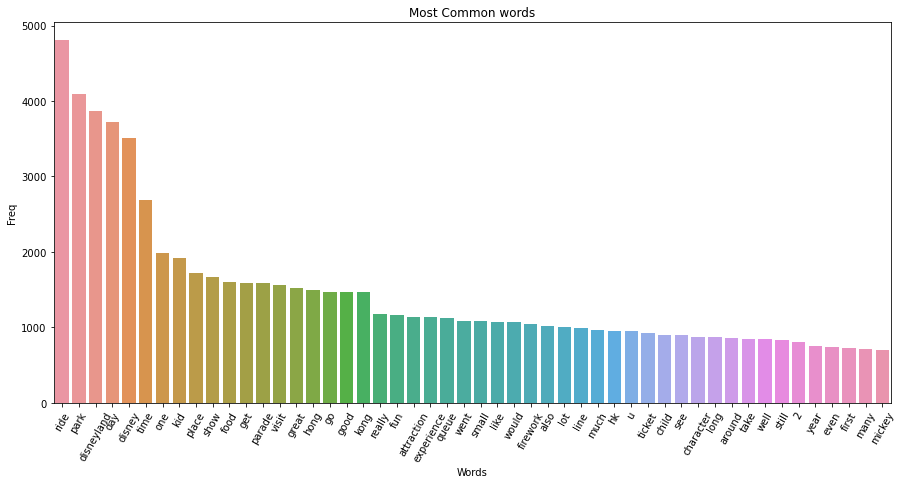

In [11]:
from collections import Counter
most_common = Counter(' '.join(df['Text']).split()).most_common(50)
mco_df = pd.DataFrame(most_common, columns = ['Words', 'Freq'])
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,7))
sns.barplot(data = mco_df, x = 'Words', y = 'Freq')
plt.title('Most Common words')
plt.xticks(rotation = 60)
plt.show()

# Least Common Words

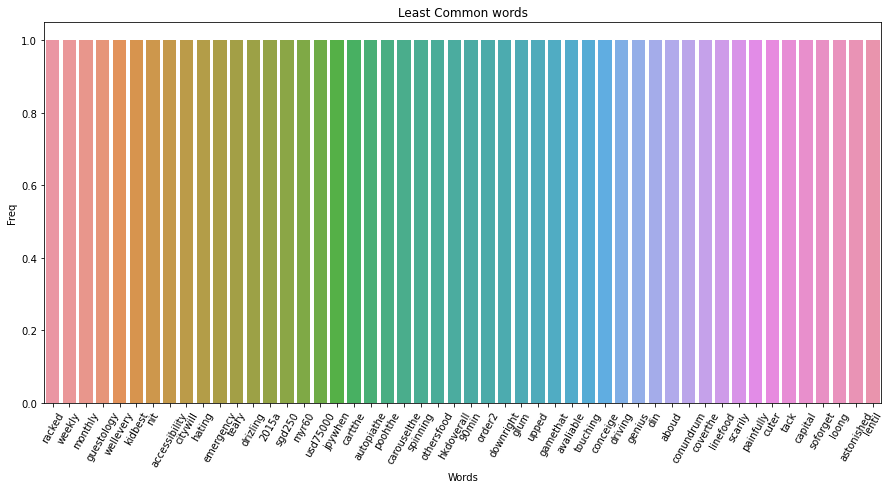

In [12]:
least_common = Counter(' '.join(df['Text']).split()).most_common()[-50 : ]
lco_df = pd.DataFrame(least_common, columns = ['Words', 'Freq'])
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,7))
sns.barplot(data = lco_df, x = 'Words', y = 'Freq')
plt.title('Least Common words')
plt.xticks(rotation = 60)
plt.show()

# Word Cloud

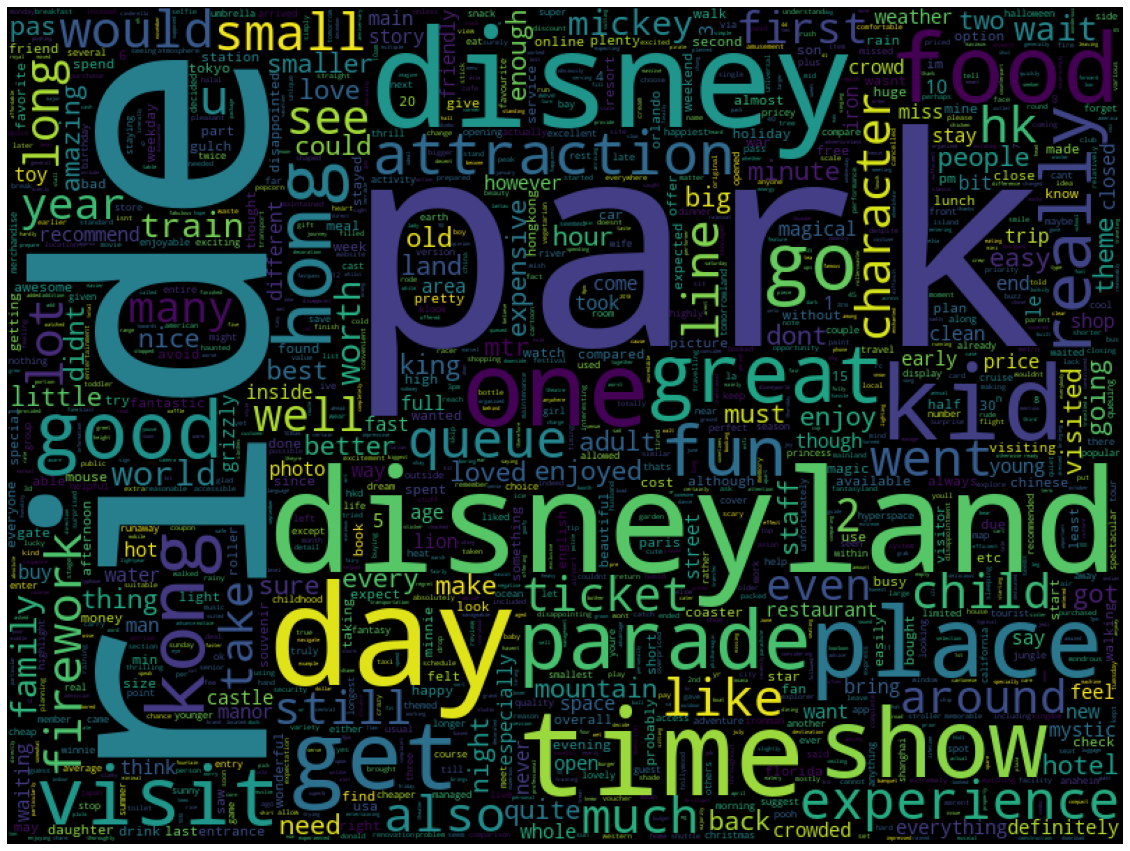

In [13]:
from wordcloud import WordCloud
word_index = Counter(" ".join(df['Text']).split())
w_cloud = WordCloud(max_words = 1500, width = 800, height = 600).generate_from_frequencies(word_index, None)
plt.figure(figsize = (20,18))
plt.imshow(w_cloud)
plt.axis('off')
plt.show()

In [14]:
df.head()

Text
0  youve ever disneyland anywhere youll find disn...
1  since last time visit hk disneyland yet time s...
2  thanks god hot humid visiting park otherwise w...
3  hk disneyland great compact park unfortunately...
4  location city took around 1 hour kowlon kid li...

# Converting text to features

### Method 1 :  Count Vectorizor

In [15]:
df1 = df.copy()

In [16]:
# Importing Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
cv = CountVectorizer()
# Conveting Text to vectors or you can say in numeric form
vectors = cv.fit_transform(df1['Text'])

In [18]:
# Checking vocabulary
print(cv.vocabulary_)

{'youve': 13964, 'ever': 4559, 'disneyland': 3818, 'anywhere': 1226, 'youll': 13942, 'find': 5102, 'hong': 6296, 'kong': 7135, 'similar': 11224, 'layout': 7270, 'walk': 13447, 'main': 7642, 'street': 11844, 'familiar': 4899, 'feel': 5033, 'one': 8645, 'ride': 10485, 'small': 11322, 'world': 13817, 'absolutely': 714, 'fabulous': 4848, 'worth': 13848, 'day': 3381, 'visited': 13362, 'fairly': 4882, 'hot': 6348, 'relatively': 10233, 'busy': 2167, 'queue': 9909, 'moved': 8206, 'well': 13612, 'since': 11238, 'last': 7235, 'time': 12492, 'visit': 13358, 'hk': 6145, 'yet': 13916, 'stay': 11736, 'tomorrowland': 12645, 'aka': 982, 'marvel': 7774, 'landnow': 7203, 'iron': 6822, 'man': 7684, 'experience': 4761, 'newly': 8390, 'open': 8690, 'ant': 1192, 'waspironman': 13499, 'great': 5766, 'feature': 5018, 'exciting': 4656, 'especially': 4493, 'whole': 13691, 'scenery': 10826, 'central': 2410, 'area': 1308, 'kowloonantman': 7163, 'changed': 2436, 'previous': 9665, 'buzz': 2180, 'lightyear': 7371, '

In [19]:
# Converting Vectors to array
vectors = vectors.toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Drawbacks of CountVectorizer
> Do not check whether the previous or next word would add any meaning to the words

> it will split 'not bad' to 'not' , 'bad' and lost the actual meaning which is good.

> This problem can be solved using N-Grams

# N-Grams

In [20]:
from nltk.util import ngrams

In [21]:
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

In [22]:
def plotNgrams(documents):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5)
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5)
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()

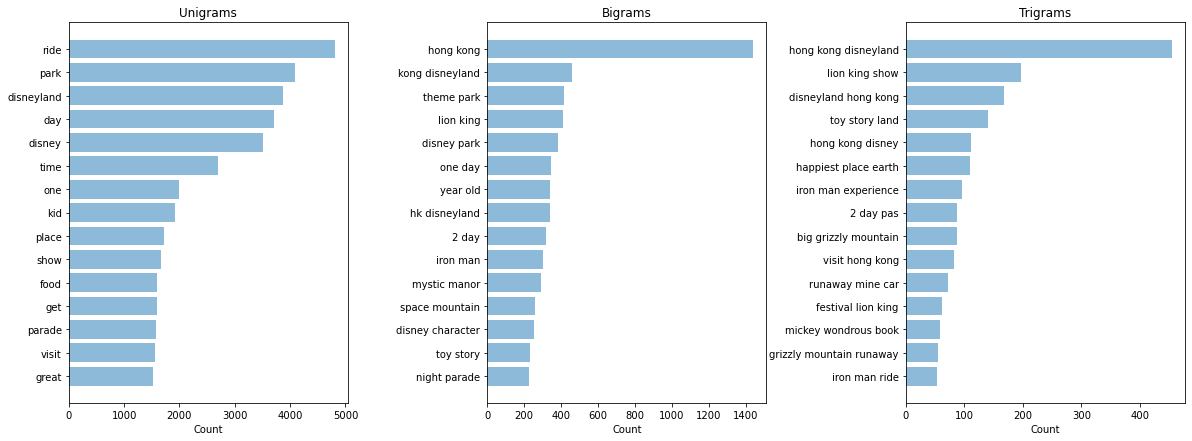

In [23]:
plotNgrams(df1['Text'])

### We can use Countvectorizer to produce Ngrams

In [24]:
cv2 = CountVectorizer(ngram_range = (2,2))
vectors2 = cv2.fit_transform(df1['Text']).toarray()

In [25]:
cv2.get_feature_names_out()

array(['01 jan', '02012018christmas theme', '03 2018', ...,
       'zootopia meet', 'zootopia ride', 'zurg take'], dtype=object)

### Hashing Vectorizer

In [26]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features = 1000)
vectors3 = hv.fit_transform(df1['Text']).toarray()
print(vectors3.shape)
vectors3

(5000, 1000)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.13483997],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# TF-IDF ( Term Frequency and Inverse Document Frequency )

> Whole Idea to use it is to show how important a word is to a document in an collection

> Term Frequency = Count of word X/ length of sentence

> Inverse Documnet Frequency : log( N/n ), N = total no. of rows , n = no. of row in which word was present

> IDF calculates rareness of the word , if a word is apprearing in all the rows than its useless


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
vectors4 = tv.fit_transform(df1['Text'])
print(tv.idf_)
print(tv.vocabulary_)

[8.82424599 8.82424599 8.82424599 ... 8.41878088 7.90795526 8.82424599]
{'youve': 13964, 'ever': 4559, 'disneyland': 3818, 'anywhere': 1226, 'youll': 13942, 'find': 5102, 'hong': 6296, 'kong': 7135, 'similar': 11224, 'layout': 7270, 'walk': 13447, 'main': 7642, 'street': 11844, 'familiar': 4899, 'feel': 5033, 'one': 8645, 'ride': 10485, 'small': 11322, 'world': 13817, 'absolutely': 714, 'fabulous': 4848, 'worth': 13848, 'day': 3381, 'visited': 13362, 'fairly': 4882, 'hot': 6348, 'relatively': 10233, 'busy': 2167, 'queue': 9909, 'moved': 8206, 'well': 13612, 'since': 11238, 'last': 7235, 'time': 12492, 'visit': 13358, 'hk': 6145, 'yet': 13916, 'stay': 11736, 'tomorrowland': 12645, 'aka': 982, 'marvel': 7774, 'landnow': 7203, 'iron': 6822, 'man': 7684, 'experience': 4761, 'newly': 8390, 'open': 8690, 'ant': 1192, 'waspironman': 13499, 'great': 5766, 'feature': 5018, 'exciting': 4656, 'especially': 4493, 'whole': 13691, 'scenery': 10826, 'central': 2410, 'area': 1308, 'kowloonantman': 716

# Advanced NLP

### Extracting Noun Phrases

In [28]:
from textblob import TextBlob
blob = TextBlob('John is Learning Natural Language Processing!')
for np in blob.noun_phrases:
    print(np)

john
learning
language processing


### Cosine Similarity

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
cv4 = CountVectorizer()
vectors4 = cv4.fit_transform(df1['Text']).toarray()
c_sim = cosine_similarity(vectors4)
print(c_sim[0 : 5])

[[1.         0.08858079 0.12896518 ... 0.02702703 0.15517288 0.02632491]
 [0.08858079 1.         0.21134099 ... 0.05905386 0.12108987 0.23007892]
 [0.12896518 0.21134099 1.         ... 0.11284453 0.09255503 0.20412415]
 [0.0949158  0.15554275 0.22645541 ... 0.07118685 0.17516226 0.06933752]
 [0.19936306 0.10890171 0.16647802 ... 0.         0.13081399 0.        ]]


# Tagging Part of Speech
> useful in Named Entity Resolution, sentimental analysis, question answering and word sense disambiguation

> RB : Adverb

> VB : Verb

> NN : Noun

> JJ : Adjective

> Etc.....

In [30]:
tokens = df1['Text'][0]
tokens = tokens.split()
tags = nltk.pos_tag(tokens)
print(tags)

[('youve', 'RB'), ('ever', 'RB'), ('disneyland', 'VB'), ('anywhere', 'RB'), ('youll', 'JJ'), ('find', 'NN'), ('disneyland', 'NN'), ('hong', 'NN'), ('kong', 'NN'), ('similar', 'JJ'), ('layout', 'NN'), ('walk', 'NN'), ('main', 'JJ'), ('street', 'NN'), ('familiar', 'JJ'), ('feel', 'VB'), ('one', 'CD'), ('ride', 'NN'), ('small', 'JJ'), ('world', 'NN'), ('absolutely', 'RB'), ('fabulous', 'JJ'), ('worth', 'JJ'), ('day', 'NN'), ('visited', 'VBD'), ('fairly', 'RB'), ('hot', 'JJ'), ('relatively', 'RB'), ('busy', 'JJ'), ('queue', 'NNS'), ('moved', 'VBD'), ('fairly', 'RB'), ('well', 'RB')]


# Named Entity Recognition

In [31]:
pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 277.1 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


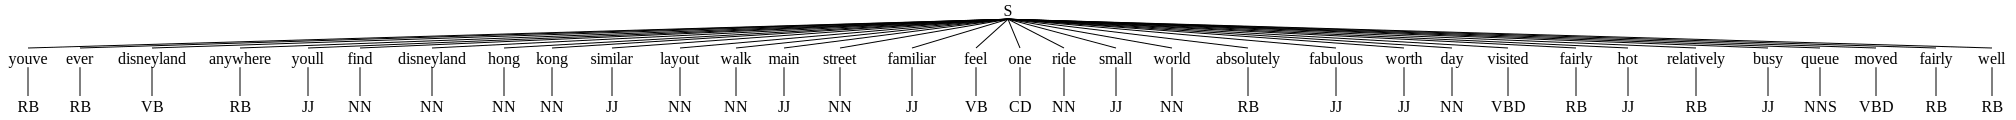

In [32]:
nltk.ne_chunk(tags , binary = False)

# Extracting Topics from Text ( Topic Modeling )

### Preparing Document Term Matrix

In [33]:
import gensim
from gensim import corpora
Lda = gensim.models.ldamodel.LdaModel
tokens = df1['Text'][0 : 10]
tokens = tokens.apply(lambda x: x.split())
print(tokens)
dic = corpora.Dictionary(tokens)
doc_term_mat = [dic.doc2bow(doc) for doc in tokens]
print(doc_term_mat)

0    [youve, ever, disneyland, anywhere, youll, fin...
1    [since, last, time, visit, hk, disneyland, yet...
2    [thanks, god, hot, humid, visiting, park, othe...
3    [hk, disneyland, great, compact, park, unfortu...
4    [location, city, took, around, 1, hour, kowlon...
5    [disney, world, disneyland, anaheim, tokyo, di...
6    [great, place, day, go, wont, even, know, obvi...
7    [think, intro, disney, magic, little, one, alm...
8    [feel, let, placethe, disneyland, train, fanta...
9    [go, talking, disneyland, whatever, say, le, d...
Name: Text, dtype: object
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)], [(4, 1), (9, 2), (15, 1), (23, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), 

### Creating LDA Model

In [34]:
lda_model = Lda(doc_term_mat, num_topics = 3, id2word = dic, passes = 200)
lda_model.print_topics()

[(0,
  '0.028*"disneyland" + 0.019*"disney" + 0.016*"food" + 0.010*"ride" + 0.010*"expensive" + 0.010*"water" + 0.010*"people" + 0.010*"park" + 0.010*"crowded" + 0.010*"really"'),
 (1,
  '0.017*"n" + 0.012*"really" + 0.012*"park" + 0.012*"time" + 0.009*"like" + 0.009*"hk" + 0.009*"something" + 0.009*"great" + 0.009*"attraction" + 0.009*"feel"'),
 (2,
  '0.017*"show" + 0.013*"one" + 0.013*"day" + 0.013*"attraction" + 0.013*"ticket" + 0.009*"well" + 0.009*"even" + 0.009*"avoid" + 0.009*"street" + 0.009*"main"')]

# Disambiguating Text
> I am going to bank

> I am going to river bank

> In both lines bank has differnet meanings based on context of sentences so lets understand the abmiguity

In [35]:
pip install pywsd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 12.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 12.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for wn: filename=wn-0.0.23-py3-none-any.whl size=31792926 sha256=806e3a5de0f1dcf340ad1892af7a9a2a5c8b0f9b987445ca9c610e0e3cf375cd
  Stored in directory: /root/.cache/pip/wheels/ec/47/17/409766c99dd470f34c512000b90b83f34747c2c975769654d7
Successfully built wn
Note: you may need to restart the kernel to use updated packages.


In [36]:
from nltk.corpus import wordnet as wn
from itertools import chain
from pywsd.lesk import simple_lesk

Warming up PyWSD (takes ~10 secs)... took 3.336178779602051 secs.


In [37]:
bank_sents = ['I went to bank to deposit my money', 'The river bank was full of plastic garbage']
sen1 = simple_lesk(bank_sents[0], 'bank')
print(f'Sense of 1st line : {sen1}')
print(f'Definition : {sen1.definition()}')
sen2 = simple_lesk(bank_sents[1], 'bank')
print('\n')
print(f'Sense of 2nd line : {sen2}')
print(f'Definition : {sen2.definition()}')

Sense of 1st line : Synset('depository_financial_institution.n.01')
Definition : a financial institution that accepts deposits and channels the money into lending activities


Sense of 2nd line : Synset('bank.n.01')
Definition : sloping land (especially the slope beside a body of water)


# Text to Speech

In [38]:
pip install gtts

Note: you may need to restart the kernel to use updated packages.


In [39]:
from gtts import gTTS
convert = gTTS(text = df1['Text'][77], lang = 'en', slow = False)
convert.save('audio.mp3')

# Language Detection and Translation

In [40]:
pip install ez_setup

  Preparing metadata (setup.py) ... done
  Created wheel for ez_setup: filename=ez_setup-0.9-py3-none-any.whl size=11015 sha256=f0903d2aa110430b6b88b1a07383837e2c6996d27fca459c0f557993369de514
  Stored in directory: /root/.cache/pip/wheels/f4/78/bd/f88c8eddfd5a8bf2a029e5cd8bc7a9914597002b081a000ffe
Successfully built ez_setup
Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install --upgrade setuptools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.2 MB/s eta 0:00:0000:0100:010m
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.8.0
    Uninstalling setuptools-59.8.0:
      Successfully uninstalled setuptools-59.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
gcsfs 2022.5.0 requires fsspec==2022.5.0, but you have fsspec 2023.1.0 which is incompatible.
cloud-tpu-client 0.10 requires google-api-python-client==1.8.0, but you have google-api-python-client 2.52.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [42]:
!pip install goslate

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for goslate: filename=goslate-1.5.4-py3-none-any.whl size=11578 sha256=bb8d71d837601cc5ee5e244c373a98e9fa4342313b435c682bab187fc6a1f000
  Stored in directory: /root/.cache/pip/wheels/7e/08/d5/88fc81ecccbff86db9b3dac7ca657c2cc64b5d10db421bd2a2
  Created wheel for futures: filename=futures-3.0.5-py3-none-any.whl size=14068 sha256=47e7eeb3125b25a35d0ad827815bdd55a4f9c39c92cf686fdc3be1a36c80d2cf
  Stored in directory: /root/.cache/pip/wheels/3d/1a/5f/8d1784420a746ea250fd82ef7652cf09f1b883ffbf0e9aa0ff
Successfully built goslate futures


In [43]:
import goslate

In [44]:
text  = 'मैं एनएलपी सीख रहा हूं'
gs = goslate.Goslate()
translated_text = gs.translate(text, 'en')
lang_id = gs.detect(text)
print(translated_text)
print(gs.get_languages()[lang_id])

I am learning NLP
Hindi


# Sentimental Analysis

In [45]:
sen_df = data[['Rating', 'Review_Text']]
sen_df.head()

Rating                                        Review_Text
0       4  If you've ever been to Disneyland anywhere you...
1       4  Its been a while since d last time we visit HK...
2       4  Thanks God it wasn   t too hot or too humid wh...
3       4  HK Disneyland is a great compact park. Unfortu...
4       4  the location is not in the city, took around 1...

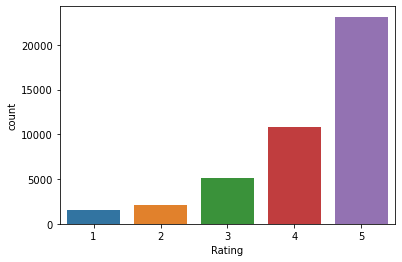

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(sen_df['Rating']);

# Creating Balanced Data with equal reviews

In [47]:
rating_1 = sen_df[sen_df['Rating'] == 1]
rating_2 = sen_df[sen_df['Rating'] == 2].sample(1499)
rating_3 = sen_df[sen_df['Rating'] == 3].sample(1499)
rating_4 = sen_df[sen_df['Rating'] == 4].sample(1499)
rating_5 = sen_df[sen_df['Rating'] == 5].sample(1499)

In [48]:
final_df = pd.concat([rating_1, rating_2, rating_3, rating_4, rating_5], axis = 0) # Concatenating all the ratings along rows so to have equal no. of rating.

In [49]:
final_df = final_df.sample(frac = 1.0) # Shuffleing all the Data

In [50]:
final_df = final_df.reset_index(drop = True)
final_df.head()

Rating                                        Review_Text
0       1  It seems Disneyland Paris is going downhill fa...
1       5  Loved everything about it. My daughter had a g...
2       5  Disneyland has something to offer to everyone,...
3       4  The park is showing it's age, but is still a f...
4       3  I actually don't feel that I was in a Disneyla...

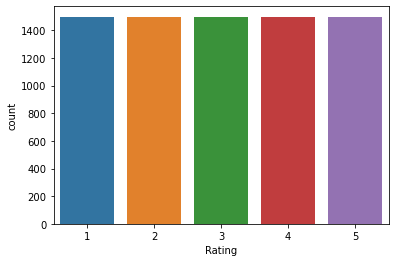

In [51]:
sns.countplot(final_df['Rating']);

> Data now have same amount of reviews for all the ratings

# Text Preprocessing

In [52]:
from textblob import Word

In [53]:
# Lowercase
final_df['Review_Text'] = final_df['Review_Text'].apply(lambda x : ' '.join(x.lower() for x in x.split()))
# Remove Punctuations
final_df['Review_Text'] = final_df['Review_Text'].str.replace('[^\w\s]', '')
# Remove StopWords
stop = stopwords.words('english')
final_df['Review_Text'] = final_df['Review_Text'].apply(lambda x : ' '.join(x for x in x.split() if x not in stop))
# Spelling Correction
#final_df['Review_Text'] = final_df['Review_Text'].apply(lambda x : str(TextBlob(x).correct()))
# Lemmatization
final_df['Review_Text'] = final_df['Review_Text'].apply(lambda x : ' '.join([Word(word).lemmatize() for word in x.split()]))

In [54]:
final_df['Review_Text'][10]

'ok first want say looking forward trip thought queuing lot child running filled dread agreed go daughter 2 year old granddaughter lot goading oh glad persuaded gowe flew belfast charles de gaulle airport transferred high speed train 10mins entrance disney free shuttle bus across road took u hotel thomas cook explorer hotel took 8 minswe arrived late evening get disney following day well say walk gate disneyland park amazing like another world disneyland hotel beautiful oh would loved able afford stay someday maybe fund permitting attention detail building cleanliness street exceptional litter never got chance lie long straight ahead castle looking made daughter get emotional big kid heart want go work nowwe proceeded seek ride suitable granddaughter thankfully queue long daughter also went bigger ride thoroughly enjoyedwe found parade began 7 clock claimed spot early idea expect amazing stunning magical music play parade catchy float character colourful attention detail breath taking 

## Word Cloud

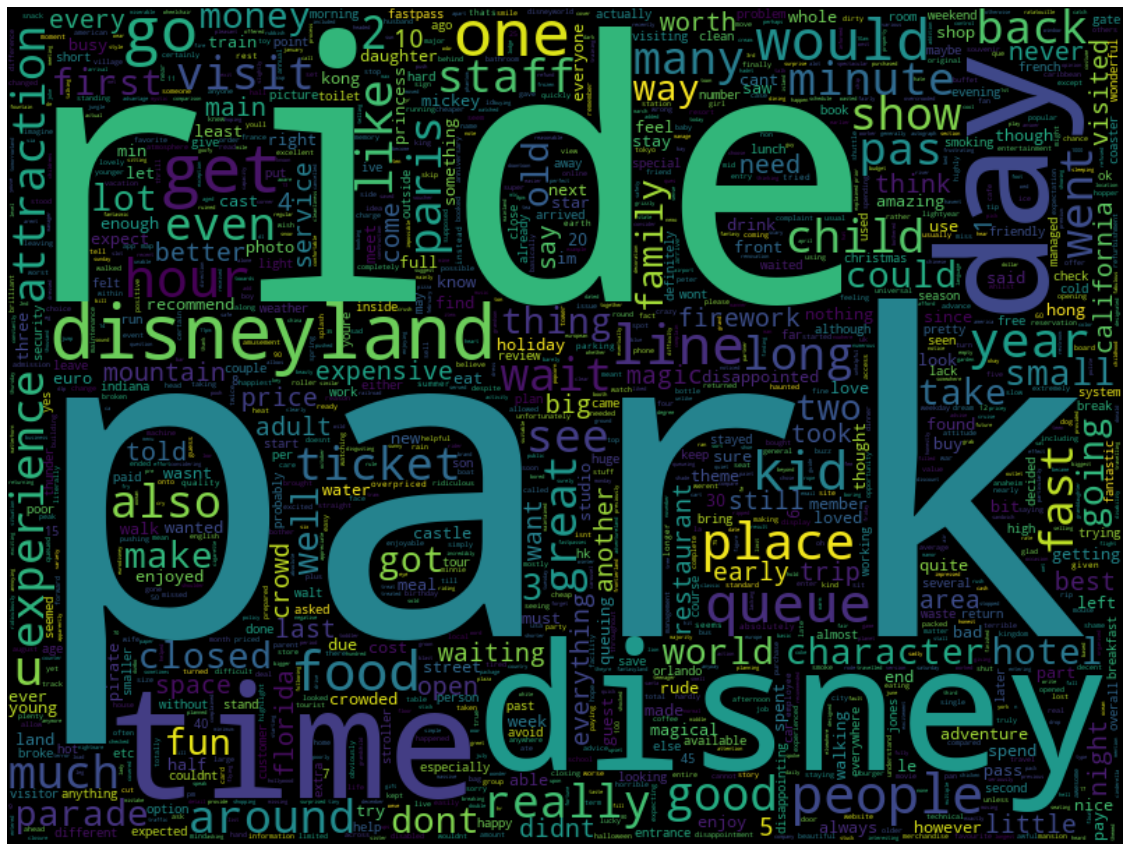

In [55]:
word_index1 = Counter(" ".join(final_df['Review_Text']).split())
w_cloud = WordCloud(max_words = 1500, width = 800, height = 600).generate_from_frequencies(word_index1, None)
plt.figure(figsize = (20,18))
plt.imshow(w_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Word Cloud for negative and positive reviews

In [56]:
neg_rev = final_df[final_df['Rating'].isin([1,2])]
pos_rev = final_df[final_df['Rating'].isin([4,5])]

### Negative Reviews

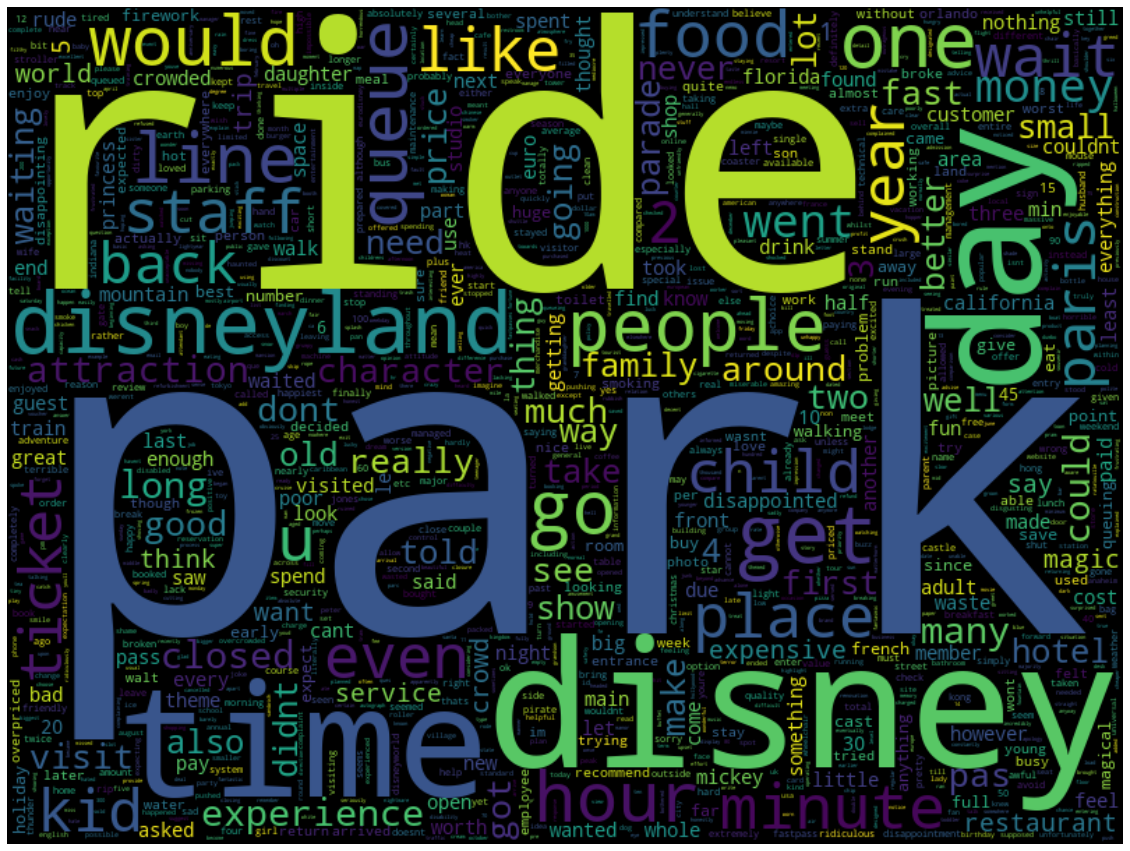

In [57]:
neg_idx = Counter(" ".join(neg_rev['Review_Text']).split())
w_cloud = WordCloud(max_words = 1500, width = 800, height = 600).generate_from_frequencies(neg_idx, None)
plt.figure(figsize = (20,18))
plt.imshow(w_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Positive Reviews

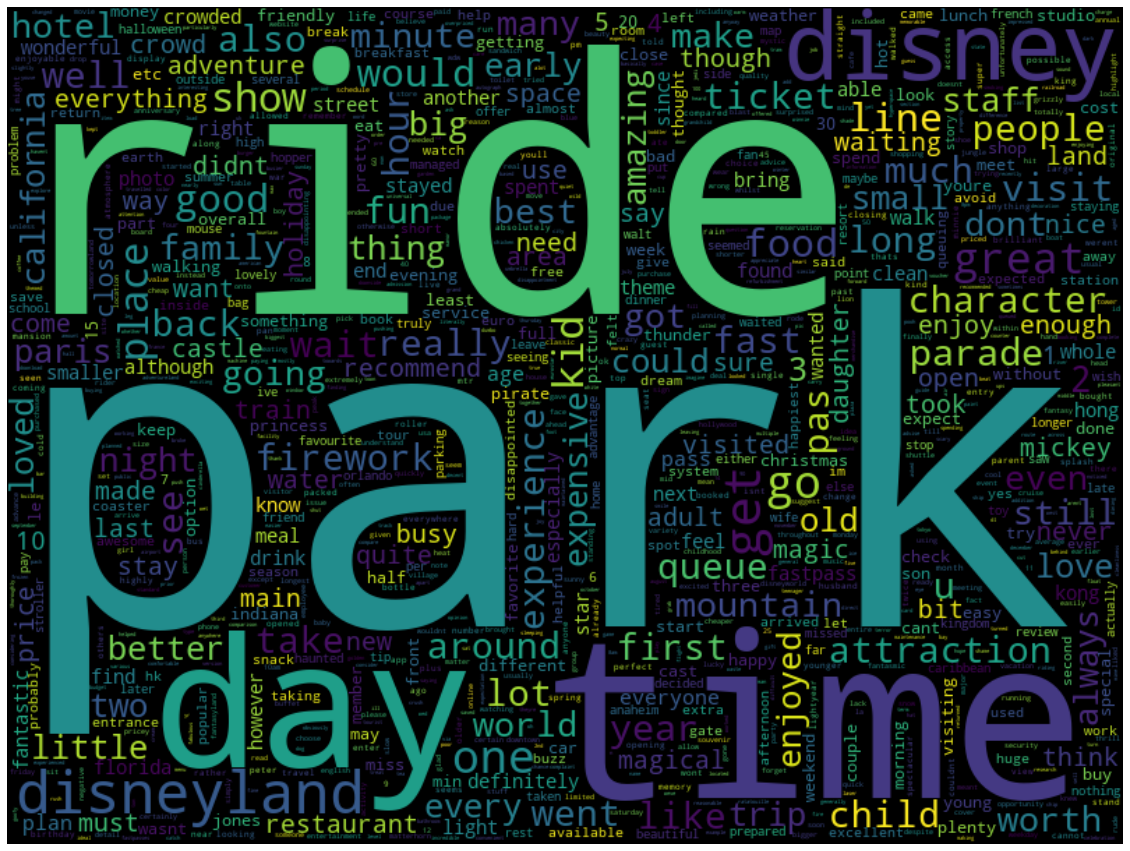

In [58]:
pos_idx = Counter(" ".join(pos_rev['Review_Text']).split())
w_cloud = WordCloud(max_words = 1500, width = 800, height = 600).generate_from_frequencies(pos_idx, None)
plt.figure(figsize = (20,18))
plt.imshow(w_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Sentiment scores

In [59]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 318.2 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [60]:
import re
import os
import sys
import ast
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [61]:
analyzer = SentimentIntensityAnalyzer()

In [62]:
## Generating Sentiments
empty_line = []
for row in final_df['Review_Text']:
    vs = analyzer.polarity_scores(row)
    empty_line.append(vs)
# Creating new df woth sentiments
sentiments = pd.DataFrame(empty_line)
sentiments.head()

neg    neu    pos  compound
0  0.089  0.713  0.198    0.9620
1  0.273  0.526  0.201   -0.2263
2  0.092  0.718  0.189    0.6515
3  0.152  0.621  0.228    0.2732
4  0.027  0.759  0.214    0.8917

In [63]:
# Merging Sentiments to Final_df
final_df = pd.concat([final_df, sentiments], axis = 1)

In [64]:
final_df.head()

Rating                                        Review_Text    neg    neu  \
0       1  seems disneyland paris going downhill fast fif...  0.089  0.713   
1       5  loved everything daughter great time able ente...  0.273  0.526   
2       5  disneyland something offer everyone whether ag...  0.092  0.718   
3       4  park showing age still fun experience family l...  0.152  0.621   
4       3  actually dont feel disneyland weekday many peo...  0.027  0.759   

     pos  compound  
0  0.198    0.9620  
1  0.201   -0.2263  
2  0.189    0.6515  
3  0.228    0.2732  
4  0.214    0.8917

In [65]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7495 entries, 0 to 7494
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       7495 non-null   int64  
 1   Review_Text  7495 non-null   object 
 2   neg          7495 non-null   float64
 3   neu          7495 non-null   float64
 4   pos          7495 non-null   float64
 5   compound     7495 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 351.5+ KB


In [66]:
import numpy

In [67]:
final_df['sentiment'] = numpy.sign(final_df['compound'])
final_df['sentiment'] = final_df['sentiment'].replace({
    1 : 'Positive', 0 : 'Neutral', -1 : 'Negative'
})

In [68]:
final_df.sample(10)

Rating                                        Review_Text    neg    neu  \
1962       3  expecting park fairly small laid standard disn...  0.100  0.769   
7463       2  disappointing attitude visited park wife 3 tee...  0.185  0.781   
6207       2  unpleasant experience visiting disneyland reso...  0.130  0.710   
834        4  first disneyland love visited disney land well...  0.000  0.669   
158        4  thoroughly enjoyed disneyland although expensi...  0.000  0.723   
4517       4  havent disney 8 year looking forward returning...  0.037  0.703   
6514       4  wonderful amenity expected disneyland much sma...  0.000  0.577   
3008       4  disneyland always fantastic whatever get fast ...  0.038  0.619   
1616       5  spotlessly clean great ride show closed refurb...  0.076  0.604   
6194       3  merchandise disneyland catered toward asian ma...  0.000  0.675   

        pos  compound sentiment  
1962  0.131    0.1779  Positive  
7463  0.035   -0.9456  Negative  
6207  0.160    0.9067  Positive  
834   0.331    0.9505  Positive  
158   0.277    0.9657  Positive  
4517  0.259    0.9900  Positive  
6514  0.423    0.8822  Positive  
3008  0.344    0.9571  Positive  
1616  0.320    0.9260  Positive  
6194  0.325    0.9313  Positive

## Business insights

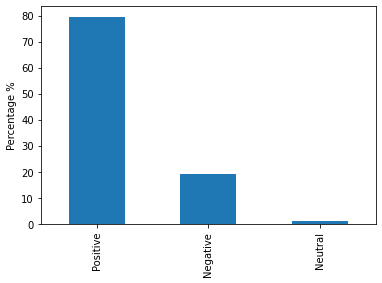

In [69]:
counts = final_df['sentiment'].value_counts()
percentages = counts/counts.sum()*100
percentages.plot.bar()
plt.ylabel('Percentage %')
plt.show()

> around 80% reviews are positive and 16-17% negative and rest are neutral

> Overall experience of custmers in disney land Hong kong was good.

# Text Summarization
> to convert large articles in small summaries

> Ex : Inshorts App provides news summaries within 60 words.

In [70]:
# Lets first import article data from wikipedia
from bs4 import BeautifulSoup
import requests
page = requests.get("https://en.wikipedia.org/wiki/Natural_language_processing")
soup = BeautifulSoup(page.content, 'html.parser')
text = soup.text

In [71]:
text = text.replace('\n', '')
text = text[2038 : 15000]

In [72]:
print(text)

ers. For the natural language processing done by the human brain, see Language processing in the brain. An automated online assistant providing customer service on a web page, an example of an application where natural language processing is a major component[1]Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.Challenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generati

In [73]:
from nltk.cluster.util import cosine_distance
from nltk.corpus import stopwords
import networkx as nx

In [74]:
def read_article(file_name):
    article = file_name.split(".")
    sentences = []

    for sentence in article:
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 
    
    return sentences

def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)
 
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = numpy.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix


def generate_summary(file_name, top_n=5):
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  read_article(file_name)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
    # print("Indexes of top ranked_sentence order are ", ranked_sentence)    

    for i in range(top_n):
        summarize_text.append(" ".join(ranked_sentence[i][1]))

    # Step 5 - Offcourse, output the summarize texr
    print("Summarize Text: \n", ". ".join(summarize_text))

In [75]:
generate_summary(text, 20)

Summarize Text: 
   Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing.   Little further research in machine translation was conducted until the late 1980s when the first statistical machine translation systems were developed.   During this time, the first chatterbots were written (e.   However, part-of-speech tagging introduced the use of hidden Markov models to natural language processing, and increasingly, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to the features making up the input data.  speech[18]).  For the natural language processing done by the human brain, see Language processing in the brain.   The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.  In some areas, this shift has entailed substanti

# Text Classification using CNN , RNN and LSTM
> We will use dataframe that we created using Sentimental Analysis

In [142]:
import tensorflow as tf

In [143]:
test_df = final_df[['Review_Text', 'sentiment']]
test_df.head()

Review_Text sentiment
0  seems disneyland paris going downhill fast fif...  Positive
1  loved everything daughter great time able ente...  Negative
2  disneyland something offer everyone whether ag...  Positive
3  park showing age still fun experience family l...  Positive
4  actually dont feel disneyland weekday many peo...  Positive

In [144]:
# Converting Target column into numerical
test_df['sentiment'] = test_df['sentiment'].replace({'Positive' : 1, 'Negative' : -1 , 'Neutral' : 0})
test_df.head()

Review_Text  sentiment
0  seems disneyland paris going downhill fast fif...          1
1  loved everything daughter great time able ente...         -1
2  disneyland something offer everyone whether ag...          1
3  park showing age still fun experience family l...          1
4  actually dont feel disneyland weekday many peo...          1

In [145]:
# splitting data in train and test
X = test_df['Review_Text']
Y = test_df['sentiment']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, shuffle = True, random_state = 1)
y_train.head()

2479    1
3773   -1
5704    1
5402    1
3426    1
Name: sentiment, dtype: int64

In [146]:
y_train.value_counts()

 1    4203
-1     991
 0      52
Name: sentiment, dtype: int64

In [147]:
# Converting labels to categorical
y_train_cat = tf.keras.utils.to_categorical(y_train,3)
y_test_cat = tf.keras.utils.to_categorical(y_test,3)

In [148]:
def get_seq(texts, tokenizer, train = True, max_seq_length = None):
    seq = tokenizer.texts_to_sequences(texts)
    if train == True:
        max_seq_length = numpy.max(list(map(len, seq)))
    seq = tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen = max_seq_length, padding = 'post')
    return seq
def preprocessing(x_train, x_test):
    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(x_train)
    print('Vocab Length : ' , len(tokenizer.word_index )+1)
    x_train = get_seq(texts = x_train, tokenizer = tokenizer, train = True)
    x_test = get_seq(texts = x_test, tokenizer = tokenizer, train = False, max_seq_length = x_train.shape[1])
    print('Sequence Length', x_train.shape[1])
    return x_train, x_test
x_train, x_test = preprocessing(x_train, x_test)

Vocab Length :  22147
Sequence Length 1078


In [149]:
x_train

array([[  241,    33,    37, ...,     0,     0,     0],
       [ 1383,     1,  1228, ...,     0,     0,     0],
       [   26,   920,   358, ...,     0,     0,     0],
       ...,
       [    6,    66,  1841, ...,     0,     0,     0],
       [22129,   299,  2264, ...,     0,     0,     0],
       [ 2507,     4,   140, ...,     0,     0,     0]], dtype=int32)

In [150]:
x_test

array([[  26,   62, 1245, ...,    0,    0,    0],
       [  62,    5,   53, ...,    0,    0,    0],
       [  11,   30,  228, ...,    0,    0,    0],
       ...,
       [ 145,    5,   45, ...,    0,    0,    0],
       [ 111, 1553, 1756, ...,    0,    0,    0],
       [   1,  145,  519, ...,    0,    0,    0]], dtype=int32)

## 1-1D CNN Model

In [152]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim = 22147,
                         output_dim = 500,
                         input_length = 1078))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv1D(128, 5,activation = 'relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv1D(128, 5,activation = 'relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))                           

In [153]:
# Compiling Model
model.compile(optimizer = 'adam',
    loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [154]:
# Fittng Model on train_set
history = model.fit(x_train,
                   y_train_cat,
                   validation_split = 0.2,
                   batch_size = 64,
                   epochs = 10,
                   callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                               patience = 3,
                                                               restore_best_weights = True))

Epoch 1/10
66/66 [==============================] - 136s 2s/step - loss: 0.7545 - accuracy: 0.7193 - val_loss: 0.5489 - val_accuracy: 0.8086
Epoch 2/10
66/66 [==============================] - 134s 2s/step - loss: 0.5568 - accuracy: 0.7950 - val_loss: 0.5443 - val_accuracy: 0.8086
Epoch 3/10
66/66 [==============================] - 134s 2s/step - loss: 0.5184 - accuracy: 0.7984 - val_loss: 0.6854 - val_accuracy: 0.8086
Epoch 4/10
66/66 [==============================] - 133s 2s/step - loss: 0.4033 - accuracy: 0.8253 - val_loss: 2.1234 - val_accuracy: 0.1800
Epoch 5/10
66/66 [==============================] - 134s 2s/step - loss: 0.2845 - accuracy: 0.8920 - val_loss: 2.5104 - val_accuracy: 0.1800


In [155]:
# Model Evaluation on Test Data
results = model.evaluate(x_test, y_test_cat, verbose  = False)
print('Accuracy : {:.3f}%'.format(results[1]*100))
print('Loss : {:.3f}'.format(results[0]))

Accuracy : 78.035%
Loss : 0.586


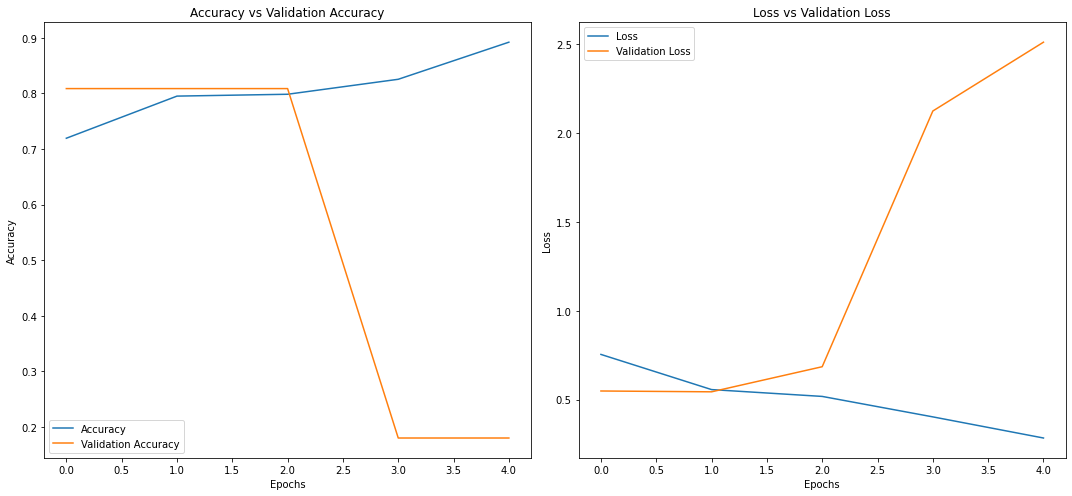

In [157]:
# Trainset vs Vaidation Accuracy and Loss
epoch = list(range(5))
plt.figure(figsize  = (15,7))
plt.subplot(1,2,1)
plt.plot(epoch, history.history['accuracy'], label = 'Accuracy')
plt.plot(epoch, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower left')
plt.subplot(1,2,2)
plt.plot(epoch, history.history['loss'], label = 'Loss')
plt.plot(epoch, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper left')
plt.tight_layout()

# 2 -  Simple RNN

In [167]:
from keras.layers.recurrent import SimpleRNN

In [170]:
# Building Simple RNN model
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(input_dim = 22147,
                         output_dim = 500,
                         input_length = 1078))
model2.add(SimpleRNN(2, input_shape = (None, 1)))
model2.add(tf.keras.layers.Dense(3, activation = 'softmax'))

# Compile model
model2.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'adam')
# Fitting Model on train data
history = model2.fit(x_train,
                    y_train_cat,
                    validation_split = 0.2,
                    batch_size = 64,
                    epochs = 15,
                    callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                                patience = 3,
                                                                restore_best_weights = True))

Epoch 1/15
66/66 [==============================] - 63s 930ms/step - loss: 0.5904 - accuracy: 0.7879 - val_loss: 0.5472 - val_accuracy: 0.8086
Epoch 2/15
66/66 [==============================] - 64s 973ms/step - loss: 0.5560 - accuracy: 0.7993 - val_loss: 0.5418 - val_accuracy: 0.8086
Epoch 3/15
66/66 [==============================] - 64s 965ms/step - loss: 0.5508 - accuracy: 0.7993 - val_loss: 0.5381 - val_accuracy: 0.8086
Epoch 4/15
66/66 [==============================] - 62s 947ms/step - loss: 0.5474 - accuracy: 0.7993 - val_loss: 0.5361 - val_accuracy: 0.8086
Epoch 5/15
66/66 [==============================] - 65s 987ms/step - loss: 0.5450 - accuracy: 0.7993 - val_loss: 0.5344 - val_accuracy: 0.8086
Epoch 6/15
66/66 [==============================] - 61s 920ms/step - loss: 0.5435 - accuracy: 0.7993 - val_loss: 0.5334 - val_accuracy: 0.8086
Epoch 7/15
66/66 [==============================] - 61s 919ms/step - loss: 0.5424 - accuracy: 0.7993 - val_loss: 0.5329 - val_accuracy: 0.8086

In [172]:
# Evaluating model on test set
results_rnn = model2.evaluate(x_test, y_test_cat, verbose = 0)
print('Accuracy : {:.3f}%'.format(results_rnn[1]*100))
print('Loss : {:.3f}'.format(results_rnn[0]))

Accuracy : 78.035%
Loss : 0.584


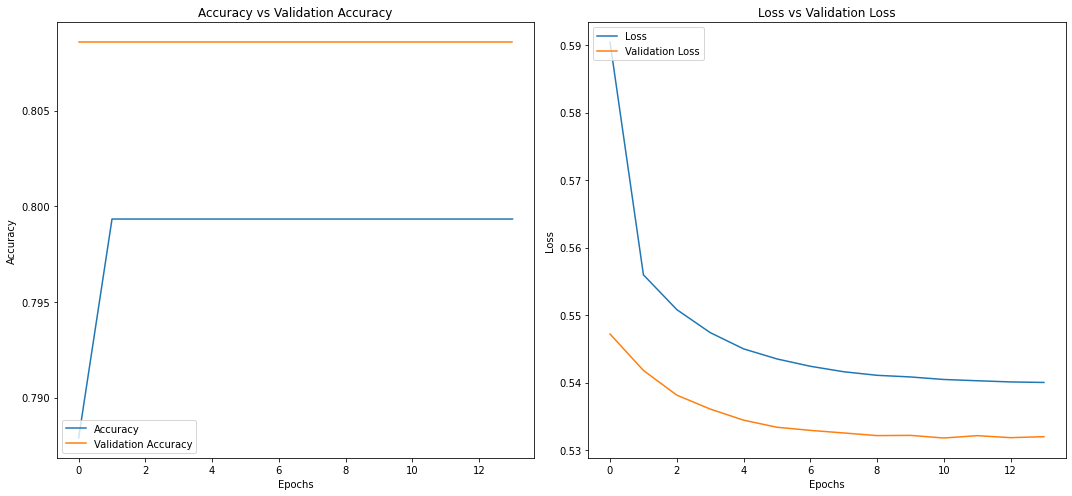

In [174]:
# Trainset vs Vaidation Accuracy and Loss for SimpleRNN
epoch = list(range(14))
plt.figure(figsize  = (15,7))
plt.subplot(1,2,1)
plt.plot(epoch, history.history['accuracy'], label = 'Accuracy')
plt.plot(epoch, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower left')
plt.subplot(1,2,2)
plt.plot(epoch, history.history['loss'], label = 'Loss')
plt.plot(epoch, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper left')
plt.tight_layout()

# 3 - LSTM Model

In [177]:
# Building LSTM Model
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Embedding(input_dim = 22147,
                         output_dim = 500,
                         input_length = 1078))
model3.add(tf.keras.layers.LSTM(16, activation = 'relu', return_sequences = True))
model3.add(tf.keras.layers.Dropout(0.2))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(3, activation = 'softmax'))
# Compile model
model3.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'adam')
# Fitting Model on train data
history = model3.fit(x_train,
                    y_train_cat,
                    validation_split = 0.2,
                    batch_size = 64,
                    epochs = 15,
                    callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                                patience = 3,
                                                                restore_best_weights = True))

Epoch 1/15
66/66 [==============================] - 90s 1s/step - loss: 0.5348 - accuracy: 0.7881 - val_loss: 0.8828 - val_accuracy: 0.8238
Epoch 2/15
66/66 [==============================] - 90s 1s/step - loss: 0.1851 - accuracy: 0.9359 - val_loss: 0.7447 - val_accuracy: 0.8305
Epoch 3/15
66/66 [==============================] - 93s 1s/step - loss: 0.0650 - accuracy: 0.9788 - val_loss: 0.5914 - val_accuracy: 0.8467
Epoch 4/15
66/66 [==============================] - 96s 1s/step - loss: 0.0226 - accuracy: 0.9957 - val_loss: 0.4816 - val_accuracy: 0.8419
Epoch 5/15
66/66 [==============================] - 93s 1s/step - loss: 0.0093 - accuracy: 0.9979 - val_loss: 0.4047 - val_accuracy: 0.8457
Epoch 6/15
66/66 [==============================] - 94s 1s/step - loss: 0.0042 - accuracy: 0.9998 - val_loss: 0.3918 - val_accuracy: 0.8457
Epoch 7/15
66/66 [==============================] - 89s 1s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.4197 - val_accuracy: 0.8476
Epoch 8/15
66/66 [==

In [178]:
# Evaluating model on test set
results_lstm = model3.evaluate(x_test, y_test_cat, verbose = 0)
print('Accuracy : {:.3f}%'.format(results_lstm[1]*100))
print('Loss : {:.3f}'.format(results_lstm[0]))

Accuracy : 83.326%
Loss : 0.409


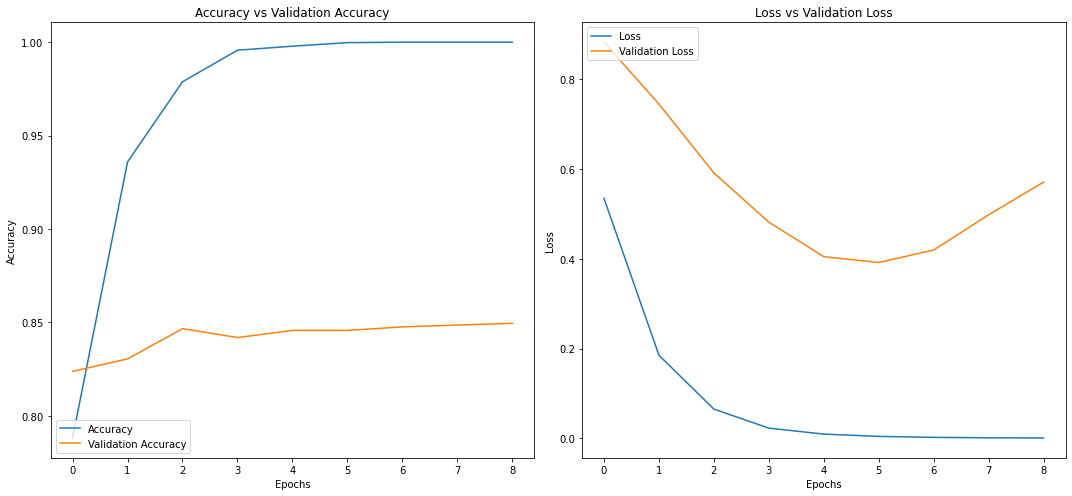

In [181]:
# Trainset vs Vaidation Accuracy and Loss for LSTM
epoch = list(range(9))
plt.figure(figsize  = (15,7))
plt.subplot(1,2,1)
plt.plot(epoch, history.history['accuracy'], label = 'Accuracy')
plt.plot(epoch, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower left')
plt.subplot(1,2,2)
plt.plot(epoch, history.history['loss'], label = 'Loss')
plt.plot(epoch, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper left')
plt.tight_layout()

# 4 - Bidirectional LSTM

In [183]:
# Building Bidirectional LSTM model
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Embedding(input_dim = 22147,
                         output_dim = 500,
                         input_length = 1078))
model4.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences = True, dropout = 0.1, recurrent_dropout = 0.1)))
model4.add(tf.keras.layers.Conv1D(64, kernel_size = 3, padding = 'valid', kernel_initializer = 'glorot_uniform'))
model4.add(tf.keras.layers.GlobalMaxPooling1D())
model4.add(tf.keras.layers.Dense(128, activation = 'relu'))
model4.add(tf.keras.layers.Dropout(0.1))
model4.add(tf.keras.layers.Dense(3, activation = 'softmax'))
# Compile model
model4.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'adam')
# Fitting Model on train data
history = model4.fit(x_train,
                    y_train_cat,
                    validation_split = 0.2,
                    batch_size = 64,
                    epochs = 20,
                    callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                                patience = 3,
                                                                restore_best_weights = True))


Epoch 1/20
66/66 [==============================] - 588s 9s/step - loss: 0.5976 - accuracy: 0.7848 - val_loss: 0.4391 - val_accuracy: 0.8181
Epoch 2/20
66/66 [==============================] - 580s 9s/step - loss: 0.3321 - accuracy: 0.8687 - val_loss: 0.3751 - val_accuracy: 0.8381
Epoch 3/20
66/66 [==============================] - 602s 9s/step - loss: 0.1237 - accuracy: 0.9576 - val_loss: 0.4397 - val_accuracy: 0.8410
Epoch 4/20
66/66 [==============================] - 580s 9s/step - loss: 0.0352 - accuracy: 0.9878 - val_loss: 0.6216 - val_accuracy: 0.8371
Epoch 5/20
66/66 [==============================] - 586s 9s/step - loss: 0.0126 - accuracy: 0.9962 - val_loss: 0.7290 - val_accuracy: 0.8429


In [185]:
# Evaluating model on test set
results_lstm_bi = model4.evaluate(x_test, y_test_cat, verbose = 0)
print('Accuracy : {:.3f}%'.format(results_lstm_bi[1]*100))
print('Loss : {:.3f}'.format(results_lstm_bi[0]))

Accuracy : 83.415%
Loss : 0.396


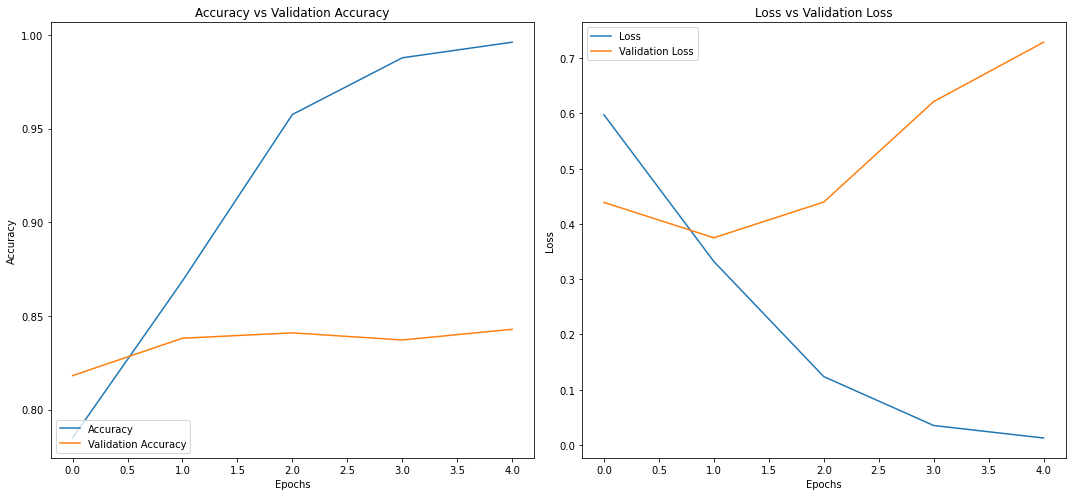

In [186]:
# Trainset vs Vaidation Accuracy and Loss for Bi-LSTM
epoch = list(range(5))
plt.figure(figsize  = (15,7))
plt.subplot(1,2,1)
plt.plot(epoch, history.history['accuracy'], label = 'Accuracy')
plt.plot(epoch, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower left')
plt.subplot(1,2,2)
plt.plot(epoch, history.history['loss'], label = 'Loss')
plt.plot(epoch, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper left')
plt.tight_layout()

# Thank You!